# 02 - Test some Matplotlib visualisations

This notebook tests some Matplotlib data visualisation capabilities from [GitHub.dev](https://github.dev) console using browser only.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

## Confidence bands examples

This example comes from [matplotlib gallery](https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html#sphx-glr-gallery-lines-bars-and-markers-fill-between-demo-py), showing an example of an chart using filling the area between lines.

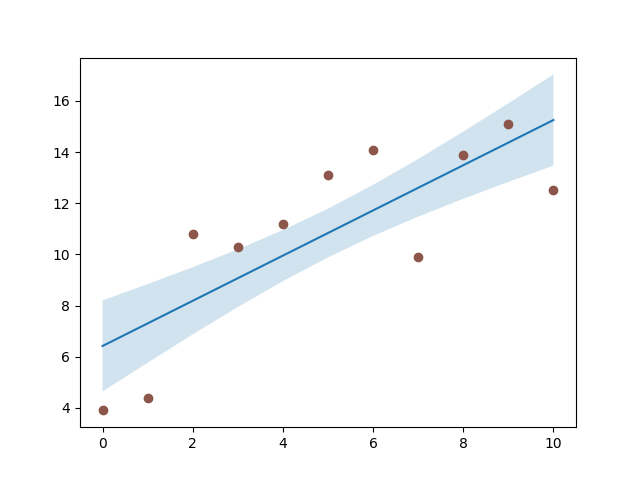

In [ ]:
N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')
plt.show()

## Box plot vs. violin plot comparison

This example comes from [matplotlib gallery](https://matplotlib.org/stable/gallery/statistics/boxplot_vs_violin.html#sphx-glr-gallery-statistics-boxplot-vs-violin-py), comparing two useful types of charts used for distribution visualisation: Box plot vs. violin plot.

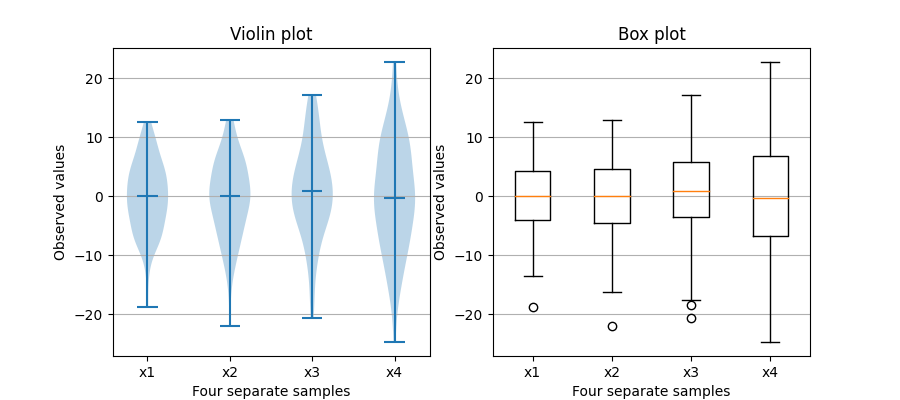

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Fixing random state for reproducibility
np.random.seed(19680801)


# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axs[0].violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data)
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

# add x-tick labels
plt.setp(axs, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()

## Bar chart on polar axis¶

Another example from [matplotlib gallery](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html#sphx-glr-gallery-pie-and-polar-charts-polar-bar-py), showing a bar chart on a polar axis, which can be used also for a radar chart type visualisation.

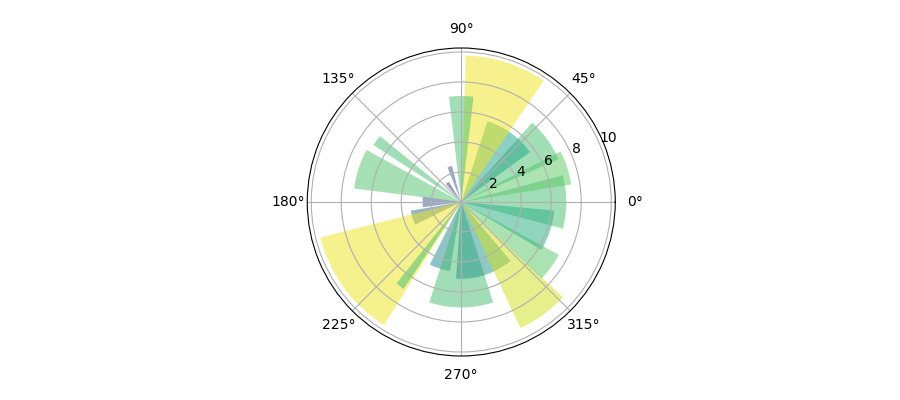

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

## GitHub contribution-like visualisation in pure matplotlib

Here is an example of a more advanced visualisation, which is in fact a time-series visualisation. I am taking the following approach:

* Create a simple visualisation which resembles GitHub's contribution like visualisation.
* Generate time series data first, without using Pandas (I'm going to test it in an another example), so using two vectors - one with dates for the last 12 months, the other one with numeric values between 0 and 10 to simulate GitHub contributions.
* Generate a visualisation for the dataset above.

In [ ]:
week_numbers = [f'Week {str(x)}' for x in np.arange(1, 53)]
week_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
contributions = np.random.randint(15, size=(7,52))

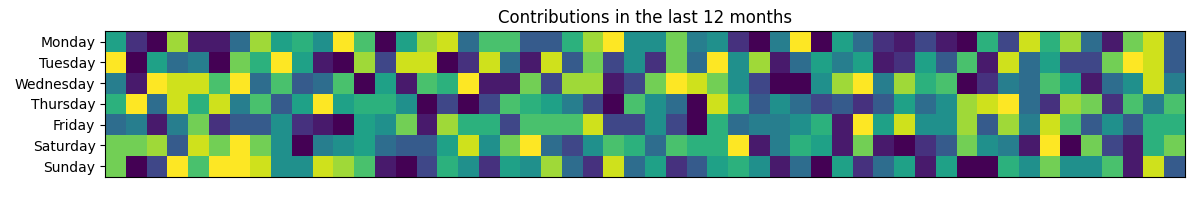

In [ ]:
matplotlib.rc('figure', figsize=(12, 2))

fig, ax = plt.subplots()
im = ax.imshow(contributions)

# We want to show all ticks...
ax.set_xticks(np.arange(len(week_numbers)))
ax.set_yticks(np.arange(len(week_days)))
# ... and label them with the respective list entries
ax.set_xticks([])
ax.set_yticklabels(week_days)

ax.set_title("Contributions in the last 12 months")
fig.tight_layout()
plt.show()

Not bad. Now let's try to give it some love and styling! Chart is based on an [annotated heatmap example](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).

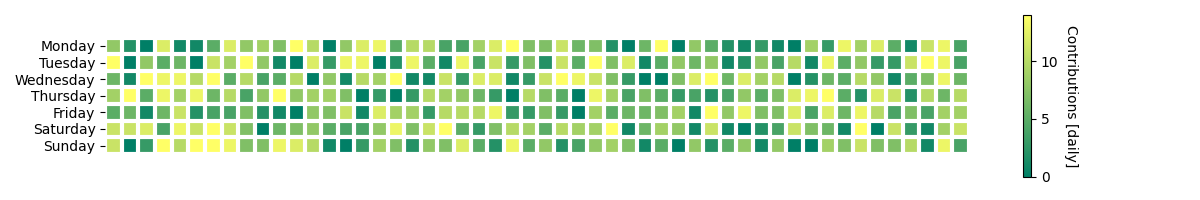

In [ ]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()

    im = ax.imshow(data, **kwargs)

    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels([])
    ax.set_yticklabels(row_labels)

    ax.tick_params(top=False, bottom=False,
                   labeltop=False, labelbottom=False)

    [ax.spines[x].set_visible(False) for x in ['top', 'right', 'bottom', 'left']]

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

fig, ax = plt.subplots()

im, cbar = heatmap(contributions, week_days, [], ax=ax, cmap="summer", cbarlabel="Contributions [daily]")

fig.tight_layout()
plt.show()